<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Modeltf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install joblib
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math

from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')


In [0]:
#FEATURES AND LABELS  

#LDR 
with open('/content/labelsFinal_withprevpm.bin','rb') as file:
  labels = pickle.load(file)
  
  
with open('/content/featuresFinal_withprevpm (1).bin','rb') as file:
  features = pickle.load(file)

In [35]:
print(np.shape(features))

(2471, 10)


In [38]:
#for x in features:
print(features[0])

[0.33333334 0.14261256 0.30079013 0.81914896 0.05712815 0.14705883
 0.11481482 0.8181818  1.         0.20111732]


In [0]:
# features =[]
# for i in temp:
#   features.append(list(i))

# labels=[]  
# for i in l:
#   labels.append(list(i))

In [0]:
## TEST SET 

x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
with open('/content/x_test.bin','wb') as file:
  pickle.dump(x_test_t, file)
with open('/content/y_test.bin','wb') as file:
  pickle.dump(y_test_t, file)

In [6]:
print(np.shape(y_test_t))

(742, 1)


In [0]:
tf.reset_default_graph()

In [8]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8715542710217730299
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3090467412885066476
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16081367815221902852
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14912199066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9605206677247347873
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:

from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(15, input_shape = (10, ), activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1,  activation = 'relu'))

In [0]:
#tf.keras.losses.Huber(delta=0.4)
model.compile(optimizer = Adam(lr = 0.001),loss='mse')
model.summary()

In [0]:
hist = model.fit([x_train_t], [y_train_t], validation_split = 0.33, epochs = 300, verbose = 1, batch_size = 32, shuffle = True)

In [0]:
tr = hist.history['loss']
val_ls = hist.history['val_loss']
plt.plot(tr[1:])
plt.plot(val_ls[1:])

In [0]:
predicted = model.predict([x_test_t])


In [0]:
print(np.shape(y_test_t))
y_test_t=np.reshape(y_test_t, (np.shape(y_test_t)[0],1))
print(np.shape(predicted))

(147, 1)
(147, 1)


In [0]:
# print(np.shape(y_test_t))
##print(np.shape(predicted))

actual =[]
pred=[]
se=0
show = np.hstack((y_test_t, predicted))

for i in show:
  se+=(i[0]-i[1])**2
  actual.append(i[0])
  pred.append(i[1])
  
 




In [0]:
rmse = (se/np.size(y_test_t))**0.5

In [0]:
print(rmse)

11.004678821178647


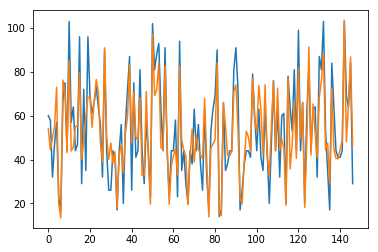

In [0]:
plt.plot(actual)
plt.plot(pred)

In [0]:
tf.reset_default_graph()

In [10]:
x = tf.placeholder(shape = (None,10), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

#Layer 1 
w1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((10, 15))), name = 'w1')
b1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,15))), name = 'b1')

#Layer2 

w2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((15,25))), name = 'w2')
b2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,25))), name = 'b2')

#out

wo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((25,1))), name = 'wo')
bo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,1))), name = 'bo')


W0825 15:53:15.954361 140674171201408 deprecation.py:506] From <ipython-input-10-efd924619411>:5: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0825 15:53:15.955991 140674171201408 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
hidl1 = tf.add(tf.matmul(x,w1),b1, name ='hidden1')
hidl1 = tf.nn.relu(hidl1)
hidl2 = tf.add(tf.matmul(hidl1,w2),b2, name = 'hidden2')
hidl2 = tf.nn.relu(hidl2)

In [0]:
#outl_batch = tf.compat.v1.layers.batch_normalization(hidl2)
out = tf.add(tf.matmul(hidl2,wo),bo,name = 'output')


In [0]:
loss = tf.reduce_mean(tf.square(tf.subtract(y,out))) 

opt = tf.train.AdamOptimizer(name = 'optimizer', learning_rate=0.005)
op_train = opt.minimize(loss, name ='train_op')

  

Add additional custom loss functions if necc 
reducing mean sqaure error 
1. reducing max deviation 

In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

4261.9473	2487.9497
4502.612	2686.9443
3577.3608	3767.3174
2956.3027	2942.9307
3851.714	2727.5898
5577.58	2715.5444
4198.6006	3046.1362
3376.7441	3758.7097
4543.7686	3166.2502
4446.6	6628.9644
2143.131	2918.3984
2395.4663	3047.702
2321.999	3677.0435
4040.1973	3817.759
3359.9275	2442.9048
2445.504	2166.2314
4117.163	3712.5195
2581.1455	3812.614
4311.339	4113.948
2688.476	3448.1145
1883.2385	3668.06
2754.7986	5399.7515
3114.8635	2242.9673
2304.702	2992.506
1899.7507	2656.5427
2156.1704	2013.2996
2924.7239	3757.1921
4390.2744	3874.1257
3383.1787	2710.0718
3905.0327	3335.9177
3173.6897	2416.2708
2468.6772	3489.9868
3368.7358	5021.7695
1878.2952	2575.3723
1749.5049	1520.3551
4098.7803	4036.0562
1299.6364	1290.5762
1608.9116	2423.419
1806.2772	2004.971
2549.9524	1485.8735
2784.2598	1203.6012
2324.28	1197.4689
3936.2383	3496.98
1335.6694	771.30664
1876.3528	2980.4143
2229.419	621.65924
965.471	1714.4896
930.9011	1760.7744
1294.8054	1012.2438
734.2323	490.91028
754.7844	1087.7069
2799.076	476.

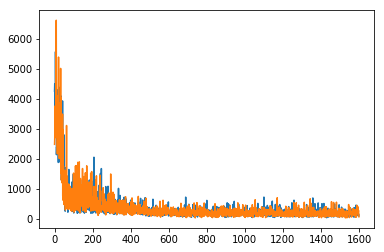

In [19]:

train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    #saved.restore(sess, "/content/final_check_weights.ckpt")
    mini =[]
    for i in range(1600):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    save_path = save.save(sess, "/content/check_weight.ckpt")
    print('Saved model!')
    
 

In [0]:
from tensorflow.python.tools import inspect_checkpoint as ckpt 

In [0]:
val = []

In [0]:
tf.reset_default_graph()

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
v1 = 16.0
v1 = np.reshape(v1, (-1,1))
scaler = StandardScaler()

v1 = scaler.transform(v1)
print(v1)
check = []

NotFittedError: ignored

In [0]:
with tf.Session() as sess:
    
    saver = tf.train.Saver()
    #saver = tf.train.import_meta_graph('/content/check_weight.ckpt.meta')
    saver.restore(sess, "/content/check_weight.ckpt")
    val.append(sess.run('output',feed_dict={x : x_batch}))

In [0]:
print*

In [23]:
print(x_batch[0])

[1.         0.732041   0.78996885 0.23404256 0.66598046 0.7647059
 0.07777778 0.09090909 1.         0.16759777]


In [21]:
print(val[0])

2487.9497


In [0]:
saver = tf.train.import_meta_graph('trained_model-1000.meta')
y_pred = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    sess.run([y_pred], feed_dict={x: input_values})

[170.82608, None, []]


In [0]:
print(type(tf.get_default_graph().as_graph_def()))
tf.io.write_graph(tf.get_default_graph().as_graph_def(), '/content/', 'FINAL_GRAPH.pbtxt')

<class 'tensorflow.core.framework.graph_pb2.GraphDef'>


'/content/FINAL_GRAPH.pbtxt'

In [0]:
with open('/content/FINAL_GRAPH.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())
  

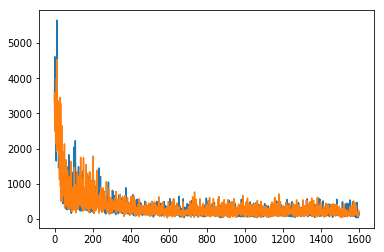

In [0]:
plt.plot(train[1:])
plt.plot(val[1:])

In [0]:
tf.trainable_variables()

[<tf.Variable 'w1:0' shape=(10, 15) dtype=float32_ref>,
 <tf.Variable 'b1:0' shape=(1, 15) dtype=float32_ref>,
 <tf.Variable 'w2:0' shape=(15, 25) dtype=float32_ref>,
 <tf.Variable 'b2:0' shape=(1, 25) dtype=float32_ref>,
 <tf.Variable 'wo:0' shape=(25, 1) dtype=float32_ref>,
 <tf.Variable 'bo:0' shape=(1, 1) dtype=float32_ref>]

In [0]:
saver = tf.train.import_meta_graph('trained_model-1000.meta')
y_pred = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    sess.run([y_pred], feed_dict={x: input_values})

In [0]:
## 48 BIT (2253,2315)
'''
features = joblib.load('/content/features48.pkl')
labels = joblib.load('/content/labels48.pkl')
'''

In [0]:
## 16 BIT (2253,267)
'''
features = joblib.load('/content/features16.pkl')
labels = joblib.load('/content/labels16.pkl')
'''